# Practice Session 04: Weighted Networks


In this session we will reconstruct the World Trade Web using [NetworkX](https://networkx.github.io/), a Python package. This practice is inspired by a paper analysing the Topology of the World Trade Web (https://arxiv.org/abs/cond-mat/0301015).

You will alo be plotting networks and data using [matplotlib](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html).

The dataset we will use comes from OECD's [quarterly international trade statistics](https://stats.oecd.org/Index.aspx?DataSetCode=QITS#) dataset, and these are your input files:

* ``trade-2022-flows.csv`` international trade in 2022
* ``trade-countries.csv`` list of countries and territories

**Important:** Remember to check you are using version 3.5 of networkx.

# 1. Read mapping of codes to country names

Read into variable ``id2name`` the file containing the list of countries and territories.

This is a tab-separated file with two columns: *code*, which is a letter code (e.g. ``PRT``),  and *name* (e.g., ``Portugal``).

You can use the following code snippet to read a compressed file:

```python
# Open a file for reading in text mode
with open(FILENAME, "rt") as input_file:

    # Create a CSV reader for a tab-delimited file with a header
    reader = csv.DictReader(input_file, delimiter='\t')
    
    # Iterate through records, each record is a dictionary
    for record in reader:
        print(record)
```

In [71]:
import csv
import io
import networkx as nx
import matplotlib.pyplot as plt
import math
import pandas as pd

In [72]:
# Ensure the paths to the files are correct

INPUT_NAMES_FILENAME = "./data/trade-flows/trade-countries.csv"
INPUT_TRADE= "./data/trade-flows/trade-2022-flows.csv"
YEAR = 2022

In [73]:
id2name = {}

In [ ]:
with open(INPUT_NAMES_FILENAME, "rt") as input_file:
    reader = csv.DictReader(input_file, delimiter='\t')
    for record in reader:
        code = record['code']
        name = record['name']
        id2name[code] = name
        

Test the mapping using the following code.

In [75]:
# LEAVE AS-IS, it should print "Finland"

print(id2name["FIN"])

Finland


# 2. Read flows data into a graph

## 2.1. Create a weighted directed graph

In [76]:
g_trade = nx.DiGraph()
with open(INPUT_TRADE, "rt", encoding="utf-8") as input_file:
    reader = csv.DictReader(input_file, delimiter='\t')
    for row in reader:
        frm = row['from']
        to = row['to']
        amount = round(float(row['amount'])/1000000)
        if amount > 0: #check >0
            if frm in id2name and to in id2name:
                print(frm, to, amount)
                g_trade.add_edge(frm, to, weight = amount)
                print("edge added!")



AUS AUT 50
edge added!
AUS BEL 1747
edge added!
AUS CAN 1348
edge added!
AUS CHE 1692
edge added!
AUS CHL 709
edge added!
AUS CZE 76
edge added!
AUS DEU 2719
edge added!
AUS DNK 98
edge added!
AUS ESP 879
edge added!
AUS EST 5
edge added!
AUS FIN 466
edge added!
AUS FRA 2073
edge added!
AUS GBR 2071
edge added!
AUS GRC 34
edge added!
AUS HUN 30
edge added!
AUS IRL 117
edge added!
AUS ISL 259
edge added!
AUS ISR 165
edge added!
AUS ITA 870
edge added!
AUS JPN 52465
edge added!
AUS LUX 1
edge added!
AUS MEX 345
edge added!
AUS NLD 5583
edge added!
AUS NOR 74
edge added!
AUS NZL 8796
edge added!
AUS POL 1030
edge added!
AUS PRT 22
edge added!
AUS SVK 3
edge added!
AUS SVN 137
edge added!
AUS SWE 648
edge added!
AUS TUR 1028
edge added!
AUS USA 12374
edge added!
AUT AUS 1307
edge added!
AUT BEL 3213
edge added!
AUT CAN 1791
edge added!
AUT CHE 10926
edge added!
AUT CHL 273
edge added!
AUT CZE 7366
edge added!
AUT DEU 61503
edge added!
AUT DNK 1157
edge added!
AUT ESP 3114
edge added!
AUT E

In [77]:
# LEAVE AS IS

print("The {:d} graph contains {:d} nodes and {:d} edges with a total weight of {:,d} million USD".format(YEAR, g_trade.number_of_nodes(),g_trade.size(),sum(d.get("weight", 0) for u, v, d in g_trade.edges(data=True))))


The 2022 graph contains 33 nodes and 823 edges with a total weight of 7,564,211 million USD


This code should have printed:

```
The 2022 graph contains 33 nodes and 823 edges with a total weight of 7,564,211 million USD
```

If it prints more than that, perhaps you read some edges having one of the two nodes outside of the list of countries.

In [78]:
# LEAVE AS-IS

for exporter in ["GBR","AUS", "USA",]:
    for importer in ["GBR","AUS", "USA",]:
      if importer!= exporter:
          print("In {:d}, {:s} ({:s}) exported to {:s} ({:s}) goods and services worth {:,d} million USD".format(
              YEAR, exporter, id2name[exporter], importer, id2name[importer],
                g_trade.get_edge_data(exporter, importer)["weight"]) )

          print("")


In 2022, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 5,447 million USD

In 2022, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,392 million USD

In 2022, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 2,071 million USD

In 2022, AUS (Australia) exported to USA (United States) goods and services worth 12,374 million USD

In 2022, USA (United States) exported to GBR (United Kingdom) goods and services worth 77,261 million USD

In 2022, USA (United States) exported to AUS (Australia) goods and services worth 30,198 million USD



It should have printed:

```
In 2022, GBR (United Kingdom) exported to AUS (Australia) goods and services worth 5,447 million USD

In 2022, GBR (United Kingdom) exported to USA (United States) goods and services worth 64,392 million USD

In 2022, AUS (Australia) exported to GBR (United Kingdom) goods and services worth 2,071 million USD

In 2022, AUS (Australia) exported to USA (United States) goods and services worth 12,374 million USD

In 2022, USA (United States) exported to GBR (United Kingdom) goods and services worth 77,261 million USD

In 2022, USA (United States) exported to AUS (Australia) goods and services worth 30,198 million USD

```

## 2.2. Compute totals

Next, compute the total exports of each country, into a dictionary: `exports`, with keys being country codes, and values being total exports. Do the same with total imports, into the variable `imports`.

To iterate through the nodes of a graph, you can use:

```python
for n in g.nodes():
    # n is the name of the node
```

To create a dictionary `dic` initialized so that all keys are the elements of set `s` and all values are zero:

```python
dic = dict([(element,0) for element in s])
```

To avoid code duplication, create a function `sum_weights(graph, direction, weight_key)`. This function should receive a *graph*, a *direction* ("in" or "out"), and a *weight_key*, defaulting to "weight".


In [79]:
def sum_weights(graph, direction, weight_key="weight"):
    dic = dict([(n, 0) for n in graph.nodes()])
    
    for n in graph.nodes():
        if direction == "out":
            # total exports - edges going out of n
            total = sum(graph[n][nbr][weight_key] for nbr in graph.successors(n))
        elif direction == "in":
            # total imports - edges coming into n
            total = sum(graph[pred][n][weight_key] for pred in graph.predecessors(n))
        else:
            raise ValueError("direction must be 'in' or 'out'")
        
        dic[n] = total
    
    return dic


# compute total exports and imports
exports = sum_weights(g_trade, "out")
imports = sum_weights(g_trade, "in")


In [80]:
# LEAVE AS-IS

for country in ['GBR', 'AUS', 'USA']:
    print("In {:d} {:s} exported goods and services worth {:,d} Million USD ,and imported goods and services worth {:,d} Million USD \n for a total trade balance of {:,d} Million USD.".format(
    YEAR, id2name[country], exports[country], imports[country], exports[country]-imports[country]
    ))
    print()

In 2022 United Kingdom exported goods and services worth 363,209 Million USD ,and imported goods and services worth 433,529 Million USD 
 for a total trade balance of -70,320 Million USD.

In 2022 Australia exported goods and services worth 97,914 Million USD ,and imported goods and services worth 93,347 Million USD 
 for a total trade balance of 4,567 Million USD.

In 2022 United States exported goods and services worth 1,309,054 Million USD ,and imported goods and services worth 1,631,960 Million USD 
 for a total trade balance of -322,906 Million USD.



It should print:

```
In 2022 United Kingdom exported goods and services worth 363,209 Million USD ,and imported goods and services worth 433,529 Million USD
 for a total trade balance of -70,320 Million USD.

In 2022 Australia exported goods and services worth 97,914 Million USD ,and imported goods and services worth 93,347 Million USD
 for a total trade balance of 4,567 Million USD.

In 2022 United States exported goods and services worth 1,309,054 Million USD ,and imported goods and services worth 1,631,960 Million USD
 for a total trade balance of -322,906 Million USD.
```

# 3. Draw the trade graph

Draw a directed graph using NetworkX with the following characteristics.

* Node size proportional to total exports.
* Directed links proportional to net trade. Plot only positive net trade values. Width also proportional to net trade.
* Use a spring model layout.
* Make sure arrow heads are visible.

You can use the following Networkx functions:

* `nx.spring_layout(g, iterations=100, weight=, k=)`
* `nx.draw_networkx_nodes(g, positions, node_color=, alpha=,node_size=)`
* `nx.draw_networkx_edges(g, pos, edgelist=, width=, edge_color=, arrows=True, min_source_margin=0, min_target_margin=)`
* `nx.draw_networkx_labels(g, pos, font_color=)`

Tune the parameter k and the size of the nodes to avoidd overlap.

Tip: a good value for the min_target_margin attribute in nx.draw_networkx_edges is $\sqrt(node\_size/\pi)$ where node_size is the same value as in the nx.draw_networkx_nodes() attribute


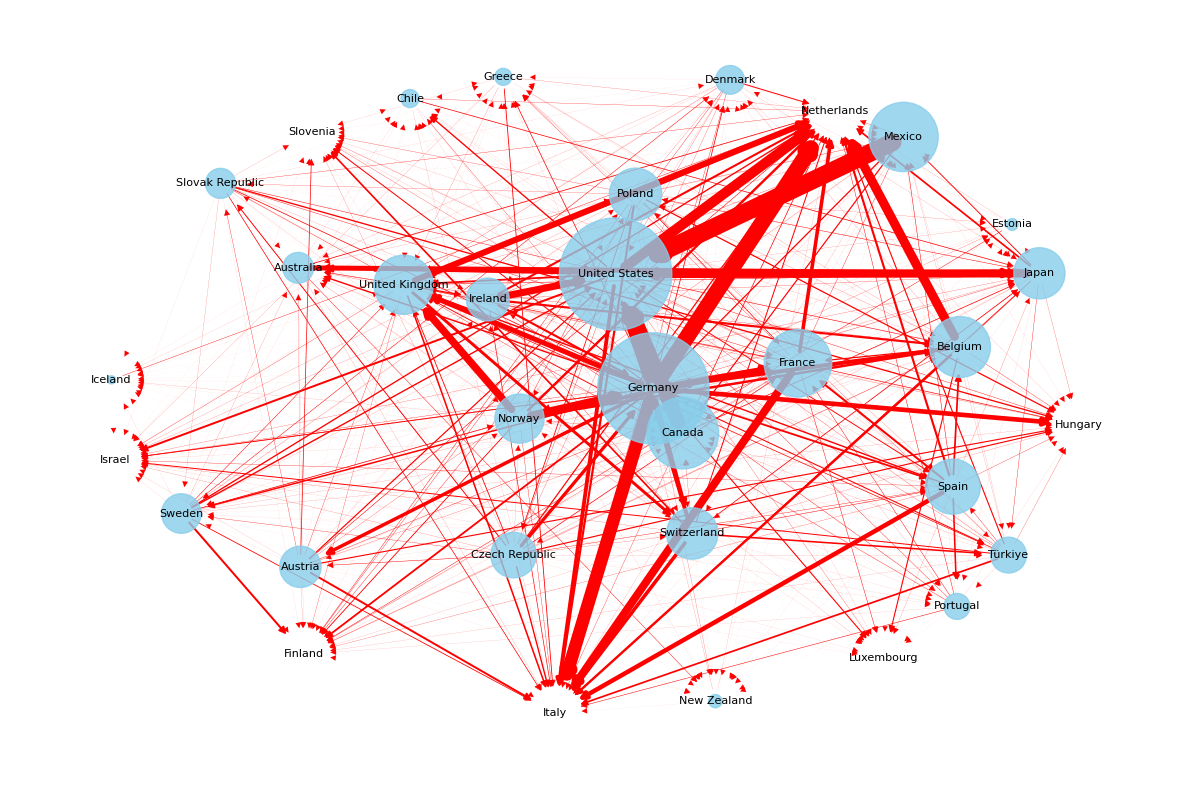

In [119]:
import numpy as np

min_target_margin_value = np.sqrt(np.mean(node_sizes) / np.pi) # calculate margin from node size

# new edges w + net trade only
net_trade_edges = []
for u, v, data in g_trade.edges(data=True):
    weight_uv = data["weight"]
    if g_trade.has_edge(v, u):
        weight_vu = g_trade[v][u]["weight"]
    else:
        weight_vu = 0 # if no edge, weight = 0
    net = weight_uv - weight_vu
    if net > 0:  # only positive edges
        net_trade_edges.append((u, v, net))

g_net = nx.DiGraph()
g_net.add_weighted_edges_from(net_trade_edges)

# spring layout
pos = nx.spring_layout(g_net, iterations=200, weight="weight", k=160)

# size proportional to total exports
node_sizes = []
for n in g_net.nodes():
    size = exports[n] / 200  # adjust scaling
    node_sizes.append(size)

# edge width proportional to net trade
edge_widths = []
for u, v, d in g_net.edges(data=True):
    width = d["weight"] / 10000  # adjust scaling
    edge_widths.append(width)

#display it
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes( # nodes
    g_net, pos,
    node_color="skyblue",
    alpha=0.8,
    node_size=node_sizes
)
nx.draw_networkx_edges( # edges
    g_net, pos,
    width=edge_widths,
    edge_color="red",
    arrows=True,
    min_source_margin=0,
    min_target_margin=min_target_margin_value
)
nx.draw_networkx_labels( # labels
    g_net, pos,
    labels=id2name,
    font_color="black",
    font_size=8
)

plt.axis("off")
plt.tight_layout()
plt.show()





<font size="+1" color="red">Replace this cell with a brief comment on the different features of these plots such as major trading countries by export volume, and some of the biggest net trade values.</font>


# 4. Comparison of export and import scores

Now, we will compare the imports and exports of different countries.

We can do this visually by plotting both in log-log scale. You can use the following code snippet, which assumes we are plotting dictionary *a* against dictionary *b*. **Do not forget to filter out cases where values of *a* or *b* are 0**:

```python
# Create log-log plot
plt.figure(figsize=(20,10))
plt.loglog()
plt.xlabel("x axis label", {'size': '22'})
plt.ylabel("y axis label", {'size': '22'})

# Add a diagonal line
plt.plot([min(a.values()),max(a.values())], [min(b.values()),max(b.values())], '-.', lw=2)

# Do the scatter plot with texts
for country in set(a.keys()).intersection(set(b.keys())):
    plt.text(a[country], b[country], country, {'size': '12'})
```

Remember to add labels to the x axis and y axis before delivering your plots, and to use a function (name it `plot_scatter`) to draw your plots: do not duplicate code.


<font size="+1" color="red">Replace this cell with your function *plot_scatter*. **Before do not forget to filter out cases where values of *a* or *b* are 0**</font>


<font size="+1" color="red">Replace this cell with a brief comment on the plot above with respect to the trade balance (the difference between exports and imports) of various countries.</font>


# DELIVER (individually)

A .zip file containing:

* This notebook.


<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>